In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")




In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)



In [7]:
# We can view all of the classes that automap found
climate = Base.classes.keys()
climate


['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

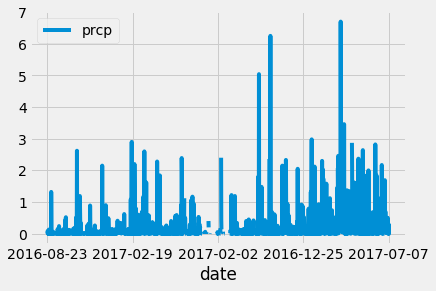

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
conn = engine.connect()
prcp_data_twelve = pd.read_sql("SELECT date, prcp FROM measurement WHERE date >= '2016-08-23' AND date <= '2017-07-10'", conn)
prcp_data_twelve = prcp_data_twelve.set_index('date')
prcp_data_twelve

# Use DataFrame.plot() in order to create a bar chart of the data
prcp_data_twelve
prcp_data_twelve.plot()


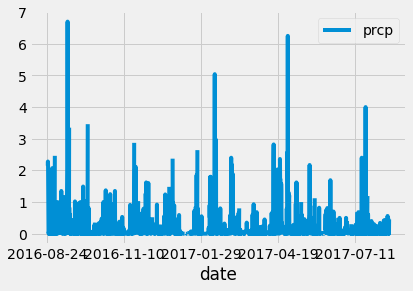

In [26]:
# Calculate the date 1 year ago from the last data point in the database
#year_ago = session.query(measurement.date).order_by(measurement.date.desc()).first()
#print(year_ago)
year_ago= dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data(date?) and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column


#INCORPORATE THE DATE RANGE AS OF A YEAR AGO
prcp_date_data = pd.read_sql("SELECT date, prcp FROM measurement WHERE date > '2016-08-23'", conn)
prcp_date_data = prcp_date_data.set_index('date')
prcp_date_data.sort_index(inplace=True)
prcp_date_data.plot()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_date_data.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [13]:
# Design a query to show how many stations are available in this dataset?
station_count = pd.read_sql("SELECT COUNT(station) AS 'Station Count' FROM station", conn)
station_count

,Station Count
0,9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_active = pd.read_sql("SELECT station, COUNT(station) AS 'Station Count' FROM measurement GROUP BY station ORDER BY 'Station Count' DESC;", conn)
print(station_active)
station_max = station_active.max()
station_max

       station  Station Count
0  USC00519523           2669
1  USC00519397           2724
2  USC00519281           2772
3  USC00518838            511
4  USC00517948           1372
5  USC00516128           2612
6  USC00514830           2202
7  USC00513117           2709
8  USC00511918           1979


station          USC00519523
Station Count           2772
dtype: object

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id = station_active['station']
station_id

station_temp_min = pd.read_sql("SELECT MIN(tobs) AS 'Min Temp' FROM measurement WHERE station = 'USC00519523';", conn)
print(station_temp_min)

station_temp_max = pd.read_sql("SELECT MAX(tobs) AS 'Max Temp' FROM measurement WHERE station = 'USC00519523';", conn)
print(station_temp_max)

station_temp_avg = pd.read_sql("SELECT AVG(tobs) AS 'Avg Temp' FROM measurement WHERE station = 'USC00519523';", conn)
print(station_temp_avg)



   Min Temp
0      56.0
   Max Temp
0      85.0
    Avg Temp
0  74.543649


Text(0.5, 0, 'Temperature')

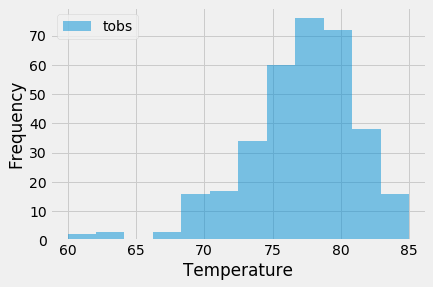

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_twelve = pd.read_sql("SELECT tobs FROM measurement WHERE station = 'USC00519523' AND date >= '2016-08-23' AND date <= '2017-08-23';", conn)
station_temp_twelve

station_temp_twelve.plot.hist(bins=12, alpha=0.5)
plt.xlabel("Temperature")
